<a href="https://colab.research.google.com/github/neklyud/yandex_ml/blob/master/yandex_ml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Просмотр данных

In [0]:
import pandas as pd

In [0]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
gender_data = pd.read_csv('gender_submission.csv')

In [7]:
print(list(train_data.columns.values))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [8]:
print(list(gender_data.columns.values))

['PassengerId', 'Survived']


# Пример использования scikit

In [19]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
X = np.array([[0, 0], [1, 1]])
y = np.array([0, 1])
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
importances = clf.feature_importances_
print(importances)

[1. 0.]


In [32]:
clf.predict([[0.6, 1.]]) # разделяющая поверхность - вертикальная прямая в районе x = 0.5

array([1])

[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

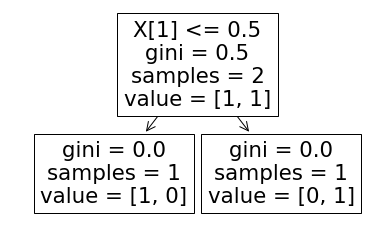

In [34]:
tree.plot_tree(clf.fit(X, y))

# Пример на датасете Iris

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

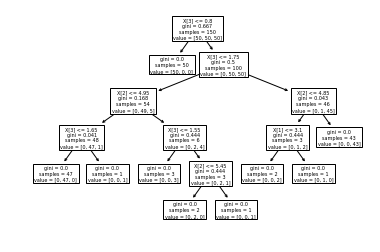

In [36]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf.fit(iris.data, iris.target)) 

# Импорт визуализированного дерева

In [40]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

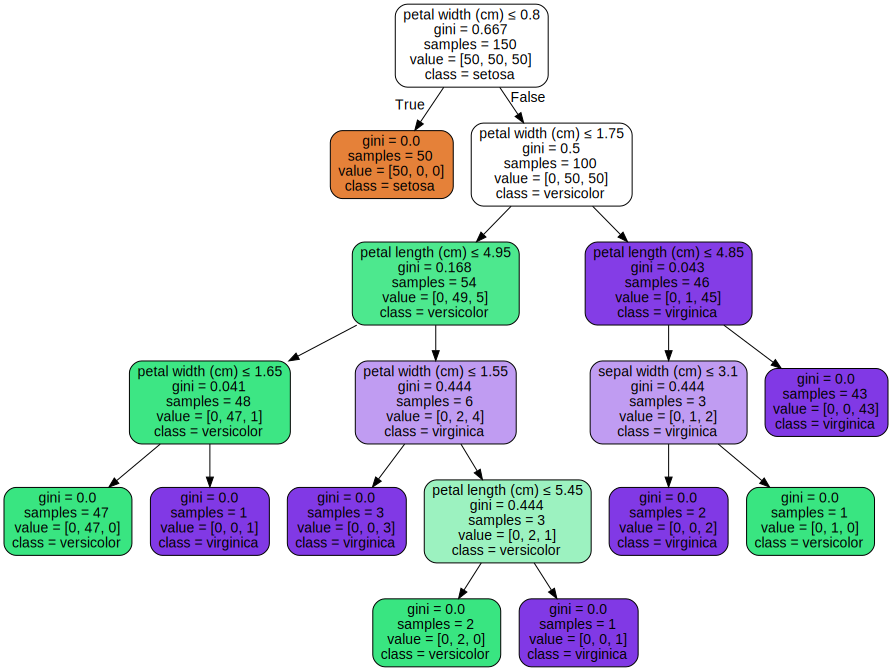

In [41]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Пример использования решающих деревьев для задачи регрессии: смоделирована функция y = x + 1

In [60]:
from sklearn import tree
X = [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0]]
y = [1, 2, 3, 4, 5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[10, 100]])

array([5.])

# Работа с пропущенными значениями в Pandas

In [0]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])

In [62]:
df

,one,two,three
a,1.332230,1.373558,-0.992561
c,-2.405076,-1.009437,0.046728
e,-1.478982,-1.147615,0.823367
f,-0.054432,0.700780,0.772909
h,-0.595835,-0.190512,-0.640163


In [0]:
df['four'] = 'bar'

In [0]:
df['five'] = df['one'] > 0

In [65]:
df

,one,two,three,four,five
a,1.332230,1.373558,-0.992561,bar,True
c,-2.405076,-1.009437,0.046728,bar,False
e,-1.478982,-1.147615,0.823367,bar,False
f,-0.054432,0.700780,0.772909,bar,False
h,-0.595835,-0.190512,-0.640163,bar,False


In [0]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [67]:
df2

,one,two,three,four,five
a,1.332230,1.373558,-0.992561,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-2.405076,-1.009437,0.046728,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-1.478982,-1.147615,0.823367,bar,False
f,-0.054432,0.700780,0.772909,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.595835,-0.190512,-0.640163,bar,False


In [68]:
pd.isna(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [69]:
df2['four'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [70]:
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [71]:
pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())

0      1
1      2
2    NaN
3      4
dtype: Int64

In [0]:
df2 = df.copy()

In [0]:
df2['timestamp'] = pd.Timestamp('20120101')


In [74]:
df2

,one,two,three,four,five,timestamp
a,1.332230,1.373558,-0.992561,bar,True,2012-01-01
c,-2.405076,-1.009437,0.046728,bar,False,2012-01-01
e,-1.478982,-1.147615,0.823367,bar,False,2012-01-01
f,-0.054432,0.700780,0.772909,bar,False,2012-01-01
h,-0.595835,-0.190512,-0.640163,bar,False,2012-01-01


In [0]:
df2.loc[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan

In [76]:
df2

,one,two,three,four,five,timestamp
a,NaN,1.373558,-0.992561,bar,True,NaT
c,NaN,-1.009437,0.046728,bar,False,NaT
e,-1.478982,-1.147615,0.823367,bar,False,2012-01-01
f,-0.054432,0.700780,0.772909,bar,False,2012-01-01
h,NaN,-0.190512,-0.640163,bar,False,NaT


In [77]:
df2.dtypes.value_counts()

float64           3
datetime64[ns]    1
bool              1
object            1
dtype: int64

In [0]:
#Вставка пропущенных значений
s = pd.Series([1, 2, 3])
s.loc[0] = None


In [82]:
df2

,one,two,three,four,five,timestamp
a,NaN,1.373558,-0.992561,bar,True,NaT
c,NaN,-1.009437,0.046728,bar,False,NaT
e,-1.478982,-1.147615,0.823367,bar,False,2012-01-01
f,-0.054432,0.700780,0.772909,bar,False,2012-01-01
h,NaN,-0.190512,-0.640163,bar,False,NaT


In [85]:
df2['one'].sum()

-1.533413935477173

In [86]:
df2.mean(1)

a    0.460332
c   -0.320903
e   -0.450807
f    0.354814
h   -0.276892
dtype: float64

In [0]:
df = df2.drop(columns=['timestamp'])

In [95]:
df.cumsum()

,one,two,three,four,five
a,NaN,1.37356,-0.992561,bar,True
c,NaN,0.36412,-0.945833,barbar,1
e,-1.47898,-0.783495,-0.122466,barbarbar,1
f,-1.53341,-0.0827147,0.650443,barbarbarbar,1
h,NaN,-0.273226,0.0102801,barbarbarbarbar,1


In [96]:
df.cumsum(skipna=False)

,one,two,three,four,five
a,NaN,1.37356,-0.992561,bar,True
c,NaN,0.36412,-0.945833,barbar,1
e,NaN,-0.783495,-0.122466,barbarbar,1
f,NaN,-0.0827147,0.650443,barbarbarbar,1
h,NaN,-0.273226,0.0102801,barbarbarbarbar,1


In [97]:
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,1.373558,-0.992561,bar,True,0
c,0.000000,-1.009437,0.046728,bar,False,0
e,-1.478982,-1.147615,0.823367,bar,False,2012-01-01 00:00:00
f,-0.054432,0.700780,0.772909,bar,False,2012-01-01 00:00:00
h,0.000000,-0.190512,-0.640163,bar,False,0


In [98]:
df2['one'].fillna('missing')

a      missing
c      missing
e     -1.47898
f   -0.0544316
h      missing
Name: one, dtype: object

ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

# Титаник

In [0]:
import pandas as pd
data = pd.read_csv('train.csv', usecols=['Pclass', 'Fare', 'Age', 'Sex', 'Survived'])

In [223]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [224]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [0]:
data = data.dropna()

In [226]:
len(data)
print(data[:1])

   Survived  Pclass   Sex   Age  Fare
0         0       3  male  22.0  7.25


In [227]:
target = data[['Survived']]
len(target)


714

In [228]:
data = data.drop(columns = ['Survived'])
data[:10]

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
6,1,male,54.0,51.8625
7,3,male,2.0,21.0750
8,3,female,27.0,11.1333
9,2,female,14.0,30.0708
10,3,female,4.0,16.7000


In [0]:
#Заменим строковый тип Sex на бинарный {0, 1}. 0 - женщина; 1 - мужчина

data.loc[data.Sex == 'female','Sex'] = 0
data.loc[data.Sex == 'male','Sex'] = 1

In [230]:
data[:10]

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
6,1,1,54.0,51.8625
7,3,1,2.0,21.0750
8,3,0,27.0,11.1333
9,2,0,14.0,30.0708
10,3,0,4.0,16.7000


In [231]:
data.dtypes

Pclass      int64
Sex         int64
Age       float64
Fare      float64
dtype: object

# Обучение

In [0]:
from sklearn import tree
X = data
y = target
clf = tree.DecisionTreeClassifier(random_state=241)
clf = clf.fit(X, y)

In [233]:
importances = clf.feature_importances_
print(importances)

[0.14000522 0.30051221 0.2560461  0.30343647]


In [209]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')